<a href="https://colab.research.google.com/github/rodrigo8502/projeto5/blob/main/trabalho7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## trabalho mvp



As midias sociais são espaços de comunicação que estão cada vez mais sendo utilizadas pelos usuários.Elas servem para os usuários publicarem fotos, interagirem com os amigos, trocarem opiniões e se informarem. São também negócios em que as marcas compram publicidade em troca de maior alcance e engajamento.O dataset contém os seguintes atributos: User_ID, identificador único para cada usuário, App, o nome do aplicativo de mídia social usado, Daily_Minutes_Spent, número total de minutos que o usuário gastou no aplicativo em um dia, variando de 5 a 500 minutos. Posts_Per_Day, quantidade de postagens feitas pelo usuário em um dia, variando de 0 a 20. Likes_Per_Day, número de curtidas que o usuário recebeu em um post em um dia, variando de 0 a 200. e Follows_Per_Day, o número de seguidores que o usuário recebeu em um dia, variando de 0 a 50. O problema consiste em prever o número de seguidores que o usuário recebe por dia com base no seu comportamento de uso nas redes sociais, com o intuito de analisar se as atividades dentro da rede social influenciam no número de seguidores.

O objetivo é entender a relação entre o número de seguidores que o usuário recebeu por dia(Follows per day) e as variáveis 'Daily_Minutes_spent' referente ao número de minutos gastos na plataforma em um dia, 'Posts_Per_Day', número de posts por dia e 'Likes_Per_Day', o número de curtidas que o usuário recebeu em um post por dia.

Hipótese: os usuários que gastam muito tempo na plataforma, o número de likes recebidos em um post por dia e o número de posts por dia tem relação com o número de seguidores que o usuário recebe

A técnica de regressão foi utilizada para prever o número de seguidores por dia pois é a técnica mais adequada para prever valores numéricos.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_regression # para o teste ANOVA da Seleção Univariada
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge


## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/social_media_usage.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [ ]:
dataset.tail() # Mostra as últimas cinco linhas do dataset

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6
999,U_1000,Pinterest,115,17,81,39


In [ ]:
dataset.shape # Mostra o número de linhas e colunas

(1000, 6)

In [ ]:
print(dataset.isnull().sum())


User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


In [ ]:
df_one_hot = pd.get_dummies(dataset, columns=['App'], prefix='App') # Aplicação do One-hot-encoding na coluna app pois contém variáveis nominais sem uma ordem específica

In [ ]:
print(np.isinf(dataset[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']]).sum())


Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


In [ ]:
# Verificar os valores únicos na coluna 'Follows_Per_Day'
valores_unicos = dataset['Follows_Per_Day'].value_counts()
print(valores_unicos)


Follows_Per_Day
47    30
20    29
9     27
15    25
2     24
22    24
42    23
4     23
10    23
12    23
39    23
5     22
43    22
0     22
16    22
45    21
35    21
30    21
21    20
23    20
32    20
25    20
34    20
8     20
37    20
44    19
7     19
17    19
33    19
24    18
41    18
38    18
3     18
14    18
49    18
19    18
26    18
28    18
18    17
40    17
50    17
1     16
48    16
46    16
6     15
36    15
11    15
27    15
13    14
31    13
29    11
Name: count, dtype: int64


In [ ]:
# Estatísticas descritivas
print(dataset['Follows_Per_Day'].describe())


count    1000.000000
mean       24.698000
std        14.842948
min         0.000000
25%        12.000000
50%        24.000000
75%        38.000000
max        50.000000
Name: Follows_Per_Day, dtype: float64


A correlação entre as variáveis Daily_Minutes_Spent, Posts_Per_Day e Likes_Per_Day com a variável Follows_Per_Day é baixa, mas a variável Daily_Minutes_Spent mostrou uma relação um pouco maior, obtendo o valor de 0.037 de correlação, o que sugere que há uma leve tendência de aumento nos seguidores com o aumento do tempo gasto na plataforma.

In [ ]:


# Calcular a correlação entre as colunas numéricas
correlation_matrix = dataset[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].corr()

print(correlation_matrix)


                     Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
Daily_Minutes_Spent             1.000000      -0.023968       0.013545   
Posts_Per_Day                  -0.023968       1.000000       0.016892   
Likes_Per_Day                   0.013545       0.016892       1.000000   
Follows_Per_Day                 0.037521       0.018113      -0.017476   

                     Follows_Per_Day  
Daily_Minutes_Spent         0.037521  
Posts_Per_Day               0.018113  
Likes_Per_Day              -0.017476  
Follows_Per_Day             1.000000  


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,2:5]  # Pega as colunas 3 até 5
y = array[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação



# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'  # Para problemas de regressão, usamos 'neg_mean_squared_error'
num_particoes = 10  # Número de partições da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # Validação cruzada para regressão


In [ ]:
# Converter X e y para float
X = X.astype(float)
y = y.astype(float)

In [ ]:
# Verificar os tipos de dados de X e y
print("Tipos de dados de X:", X.dtype)
print("Tipos de dados de y:", y.dtype)

Tipos de dados de X: float64
Tipos de dados de y: float64


O SelectKbest foi utilizado para escolher os melhores atributos. Todos os tres atributos foram escolhidos, sendo atribuído uma pontuação elevada de 1.407 para o atributo 'Daily_Minutes_Spent', enquanto 'Posts_Per_Day' recebeu 0.328 e 'Likes_Per_Day 0.305.

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=3)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[2:5])

# Exibe as pontuações de cada atributos e os 3 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[2:5]))


Número original de atributos: 3

Número reduzido de atributos: 3

Atributos Originais: Index(['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day'], dtype='object')

Scores dos Atributos Originais: [1.407 0.328 0.305]

Atributos Selecionados: ['Daily_Minutes_Spent' 'Posts_Per_Day' 'Likes_Per_Day']


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base. Os modelos Regressão Linear e AdaBoostRegressor tiveram os melhores desempenhos e um desvio padrão baixo, tendo bons resultados na avaliação dos modelos.


LR: -223.224328 (24.434841)
KNN: -273.184500 (36.966095)
CART: -440.520000 (45.823951)
SVR: -224.290686 (26.027459)
Bagging: -262.900844 (24.152185)
RF: -263.281654 (26.729112)
ET: -279.098786 (23.562407)
Ada: -223.004144 (23.203016)
GB: -243.189875 (27.971344)
Voting: -281.157174 (24.148561)


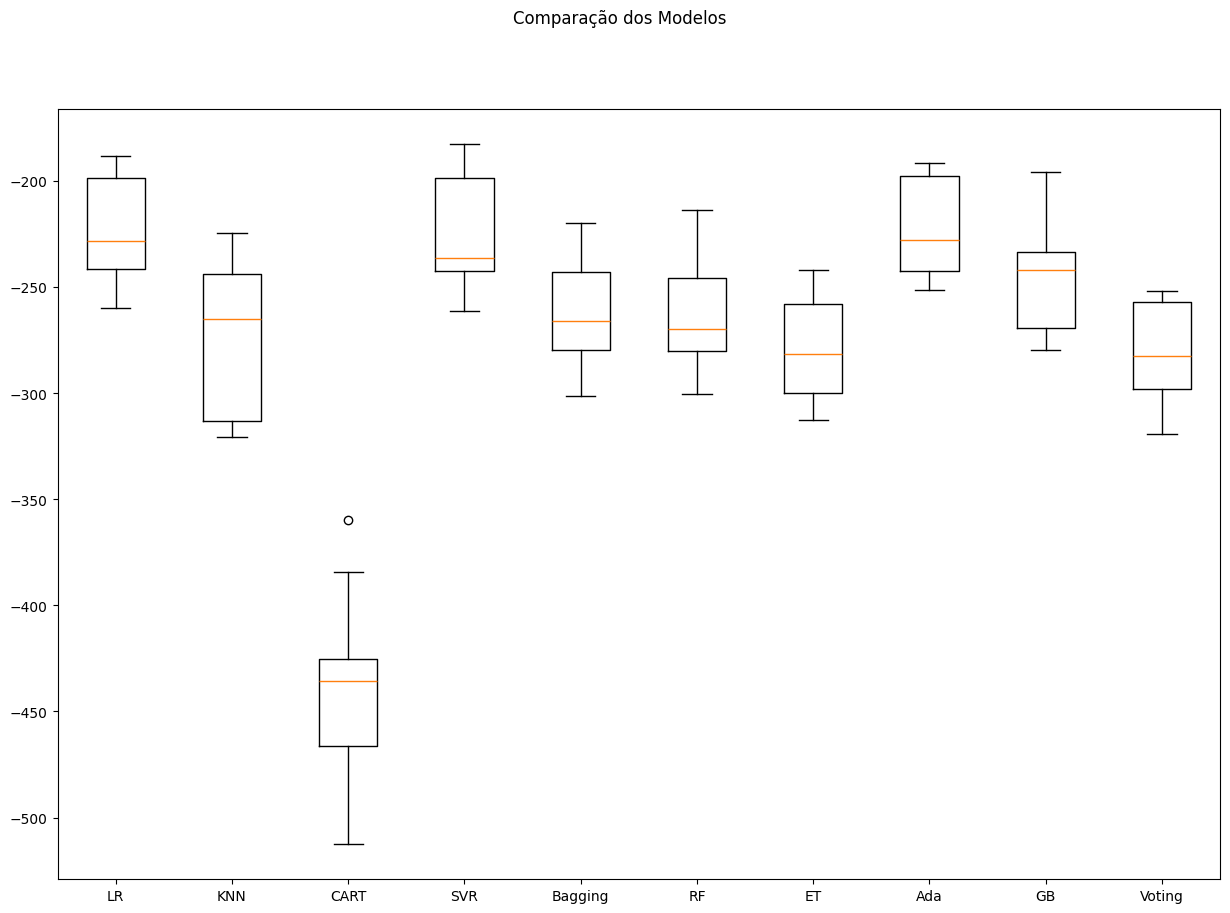

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Definindo os parâmetros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []

model2 = DecisionTreeRegressor()
bases.append(('cart', model2))
model3 = SVR()
bases.append(('svr', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingRegressor(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados. O AdaBoost Regressor teve o melhor desempenho no cenário original  com uma leve queda nos cenários padronizado e normalizado. A Regressão linear teve o segundo melhor desempenho no cenário original, mas com o melhor desempenho no cenário padronizado e normalizado.

KNN-orig: -273.185 (36.966)
LR-orig: -223.224 (24.435)
SVR-orig: -224.291 (26.027)
RF-orig: -263.725 (23.836)
ET-orig: -277.483 (26.332)
Ada-orig: -221.573 (23.854)
GB-orig: -243.215 (27.909)
Vot-orig: -274.953 (29.645)
KNN-padr: -278.916 (27.217)
LR-padr: -223.224 (24.435)
SVR-padr: -227.056 (26.454)
RF-padr: -264.439 (23.692)
ET-padr: -276.034 (30.440)
Ada-padr: -228.078 (28.010)
GB-padr: -244.139 (27.388)
Vot-padr: -276.566 (27.295)
KNN-norm: -279.874 (27.685)
LR-norm: -223.224 (24.435)
SVR-norm: -227.111 (26.450)
RF-norm: -266.130 (27.547)
ET-norm: -275.111 (26.698)
Ada-norm: -224.714 (23.133)
GB-norm: -243.823 (26.520)
Vot-norm: -276.873 (29.920)


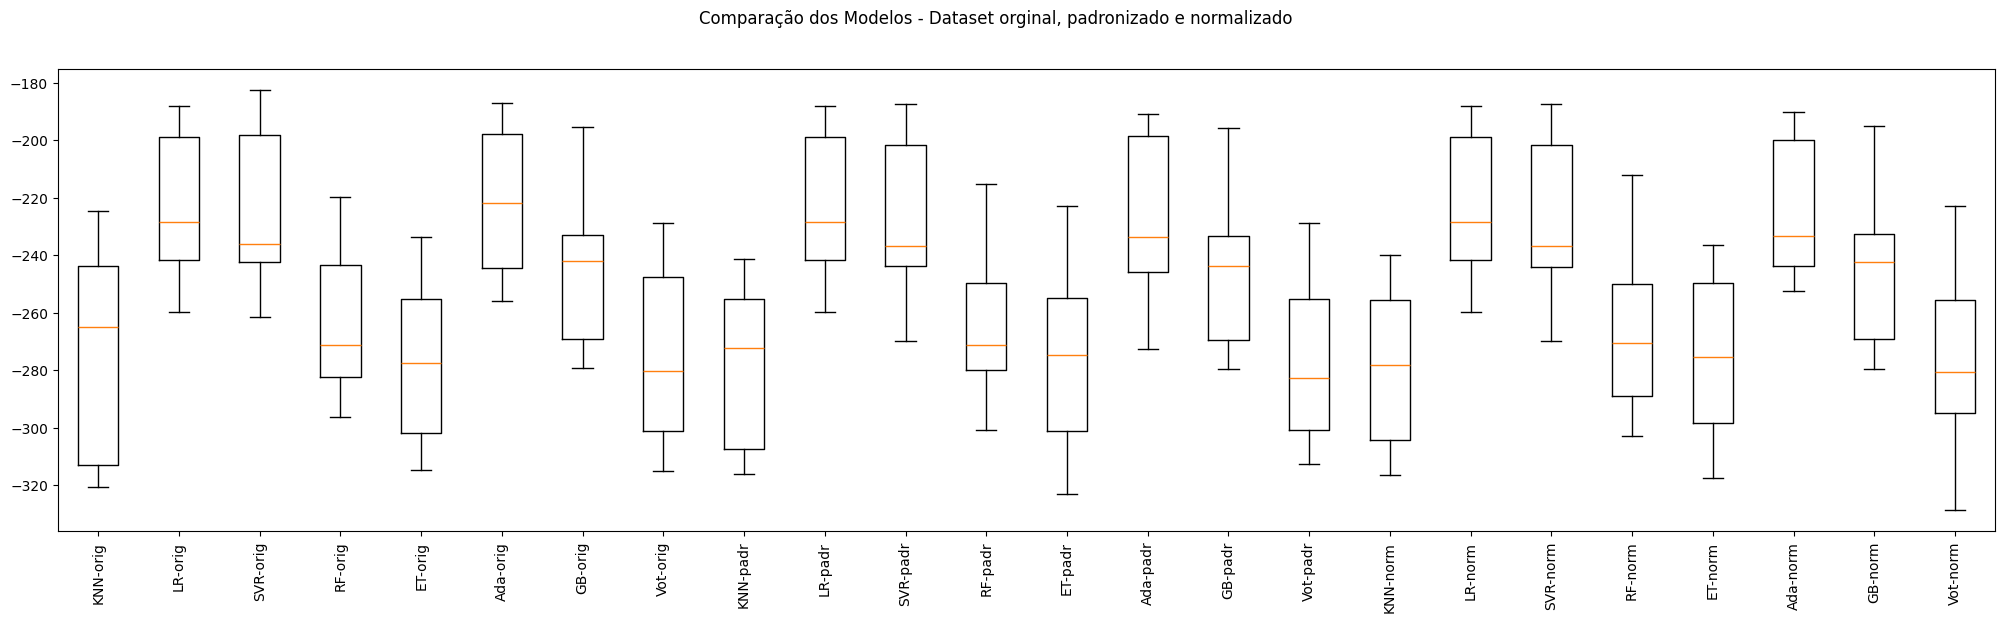

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados

LR = ('LR', LinearRegression())
SVR = ('SVR', SVR())
knn = ('KNN', KNeighborsRegressor())
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=num_trees))
voting = ('Voting', VotingRegressor(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original

pipelines.append(('KNN-orig', Pipeline([knn])))

pipelines.append(('LR-orig', Pipeline([LR])))
pipelines.append(('SVR-orig', Pipeline([SVR])))

pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, LR])))

pipelines.append(('SVR-padr', Pipeline([standard_scaler, SVR])))

pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, LR])))

pipelines.append(('SVR-norm', Pipeline([min_max_scaler, SVR])))

pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros do AdaBoostRegressor utilizando GridsearchCV. O n_estimators mostra o número de estimadores que o modelo AdaBoost utilizará. A escolha de 50, 100 e 200 permite testar modelos com diferentes números de árvores e analisar como esse hiperparâmetro afeta o desempenho. A taxa de aprendizado controla o impacto de cada estimador no modelo. Valores menores de learning_rate foram escolhidos pois fazem com que cada árvore tenha um impacto menor no modelo final, o que pode ser útil para evitar o overfitting.

In [ ]:
# Tuning do AdaBoostRegressor

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
ada_boost = ('AdaBoost', AdaBoostRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ada-orig', Pipeline(steps=[ada_boost])))
pipelines.append(('ada-padr', Pipeline(steps=[standard_scaler, ada_boost])))
pipelines.append(('ada-norm', Pipeline(steps=[min_max_scaler, ada_boost])))

param_grid = {
    'AdaBoost__n_estimators': [50, 100, 200],  # Número de estimadores (árvores)
    'AdaBoost__learning_rate': [0.01, 1, 1]  # Taxa de aprendizado
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: ada-orig - Melhor: -221.579844 usando {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n_estimators': 50}
Sem tratamento de missings: ada-padr - Melhor: -221.731387 usando {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n_estimators': 200}
Sem tratamento de missings: ada-norm - Melhor: -221.570537 usando {'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 200}


## Finalização do Modelo. O modelo escolhido foi o AdaBoosterRegressor para o processo de treinamento e avaliação do modelo pois teve bom desempenho e lida bem com relações complexas e não lineares. O resultado é o cálculo do MSE das previsões feitas pelo modelo no conjunto de teste.


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = AdaBoostRegressor()
model.fit(rescaledX, y_train)

# Estimativa do erro quadrático médio no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

232.75216445466918


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

AdaBoostRegressor()

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'Daily_Minutes_Spent':  [250, 15, 20],
        'Post_Per_Day': [150, 9, 25],
        'Likes_Per_Day': [120, 60, 15]

          }

atributos = ['Daily_Minutes_Spent', 'Post_Per_Day', 'Likes_Per_Day', ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:3].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.799e-02  2.284e+01  4.401e-01]
 [-1.588e+00 -2.074e-01 -6.028e-01]
 [-1.554e+00  2.408e+00 -1.385e+00]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[24.221 21.069 24.349]


As métricas escolhidas foram o MSE e o RMSE. O MSE calcula a média dos quadrados das diferenças entre os valores reais e os valores previstos. É uma métrica que condiz com o problema pois é sensível a grandes erros, já que os erros são elevados ao quadrado.É uma métrica de regressão para problemas onde o objetivo é prever valores numéricos.O RMSE calcula a raiz quadrada do MSE e faz com que o erro seja medido na mesma unidade da saída do problema.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))



MSE 236.33
RMSE 15.37
Coeficiente de Determinação (R²): -0.0849
